In [79]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import powerlaw
from scipy.special import factorial
import warnings

#suppress warnings
#Ref: https://www.statology.org/runtimewarning-overflow-encountered-in-exp/#:~:text=This%20warning%20occurs%20when%20you,provides%20the%20warning%20by%20default.
warnings.filterwarnings('ignore')

In [80]:
#Load data
g_amazon = nx.read_gml("data/graph_amazon.gml")
g_escort = nx.read_gml("data/graph_escort.gml")
g_internet = nx.read_gml("data/graph_internet.gml")

Dataset: Amazon
The average degree is: 5.529855493141971
𝛾: 1.4673205424748599
Error: 0.0008075720698336667


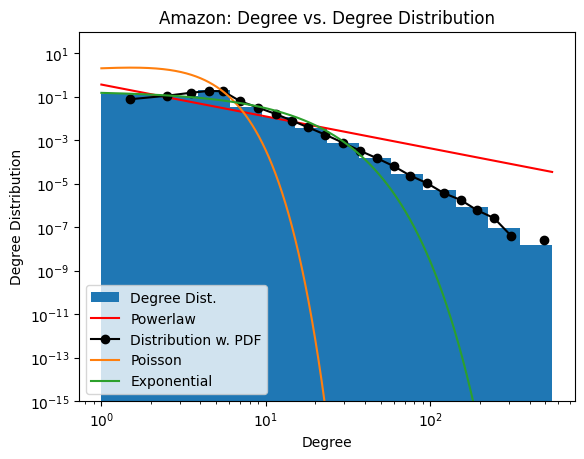

--------------------------------------------------------------------
Dataset: Escort
The average degree is: 4.667543335325762
𝛾: 1.6489019935437905
Error: 0.005016850251404289


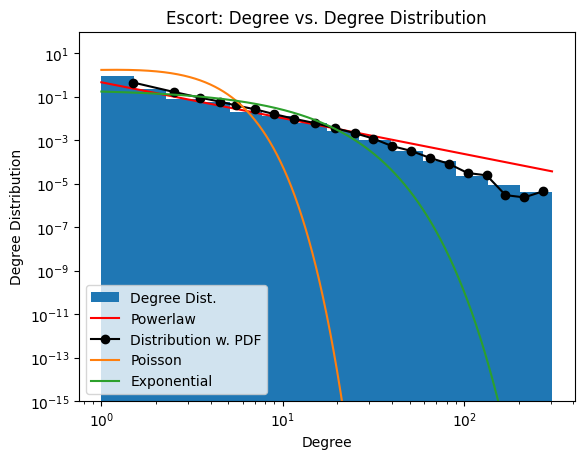

--------------------------------------------------------------------
Dataset: Internet
The average degree is: 6.197750352406432
𝛾: 1.6649249778242199
Error: 0.003566370974999353


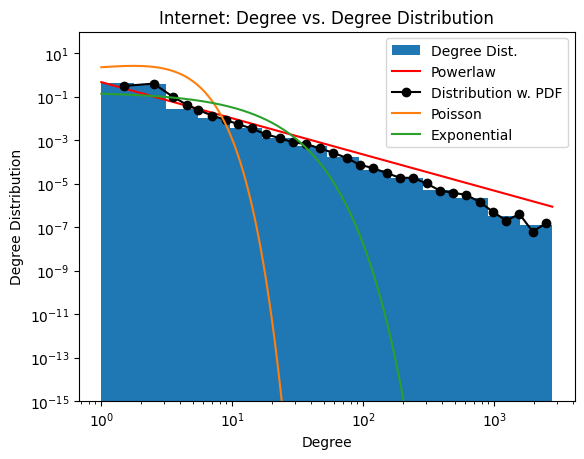

--------------------------------------------------------------------


In [107]:
#A05.1 Everyday networks are not Poisson: parameter estimation and model selection
#Task: For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).
#1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error
#2. In the same plot show: the empirical degree distribution; the power-law fit; 
# the Poisson fit and the exponential distribution with mean value equal to ⟨𝑘⟩. 
# Which distribution is more likely to describe the data?
def poisson(k, lamda):
    return ((lamda**k)/(factorial(k))) * np.exp(-k)

def expo(k, lamda):
    return lamda**(-1) * np.exp(-k/lamda)

def myfunc(x,alpha):
    return x**(-alpha)

# Super mighty function for Task 1&2......
def dist_ave_pow(name, graph):
    print("Dataset: " + name)
    #Load degrees
    g_degrees = graph.degree()
    degrees = [ g_degrees[i] for i in graph.nodes() ]

    #Compute ave. degres
    sum_deg = []
    for i in degrees:
        sum_deg.append(i)
    ave_degree = sum(sum_deg) / len(sum_deg)
    print("The average degree is: " + str(ave_degree))

    #powerlaw
    k = np.sort(np.asarray([d for d in dict(graph.degree()).values()]), )
    spacing = np.linspace(min(k),max(k),len(k))
    #Note from Teams by Carlo 04/11: 
    # "Indeed the p(x)=Kx^-a is not a proper distribution, as for x=0 it diverges."
    fit = powerlaw.Fit(k, discrete=True, xmin=1)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma

    print("𝛾: " + str(alpha))
    print("Error: " + str(sigma))

    #Create the plot
    my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 15 )
    _ = plt.hist(degrees, bins = my_bins, density = True, label="Degree Dist.") 
    fit.power_law.plot_pdf(color='r', label="Powerlaw")
    powerlaw.plot_pdf(k,color='k',marker='o', label="Distribution w. PDF")
    plt.plot(spacing,poisson(spacing,ave_degree), label="Poisson")
    plt.plot(spacing,expo(spacing,ave_degree), label="Exponential")
    plt.title(name + ": Degree vs. Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    plt.ylim(bottom=myfunc(10, 15), top=myfunc(10,-2))
    plt.legend()
    plt.show()

    #Division between different datasets
    print("--------------------------------------------------------------------")


dist_ave_pow("Amazon", g_amazon)
dist_ave_pow("Escort", g_escort)
dist_ave_pow("Internet", g_internet)

Amazon is probably better fit with exponential (at the beginning).

Escort is better fit with powerlaw.

Internet is also better fit with powerlaw.

#3. What does it mean in practice for Amazon products?

So the co-purchased products do not follow the scale-free network or hub-like property (few nodes linked to most nodes). In other words, there does not exist buying some products will eventurally lead to buy certain few products (those hubs). It may suggests that Amazon have large varities of products. Suppose we have an online store which only sells the computer and its accessories. A scale-free network may appear which buy computer will lead to buy accessories. In the end, those many accessories are linked to only computer. Apparantly, Amazon is not and it sells so many kinds of products which lead to a non-scale-free network. 

In [91]:
#A05.2 Barabási-Albert model
#Task: Build networks with the Barabási-Albert model. 
# Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000.
m = 3
N = [50, 100, 500, 1000, 5000]

glist = []
for n in N:
    g = nx.barabasi_albert_graph(n, m)
    glist.append(g)

glist

In [92]:
#1. Compute the average clustering coefficient, assortativity,
#average shortest path length and diameter for the generated networks
ave_cluster = []
assortativity = []
ave_shortest_path = []
diameter = []

for graph in glist:
    ave_cluster.append(nx.average_clustering(graph))
    assortativity.append(nx.degree_assortativity_coefficient(graph))
    ave_shortest_path.append(nx.average_shortest_path_length(graph))
    diameter.append(nx.diameter(graph))

for i in range(len(N)):
    print("Network " + str(N[i]) + " - average clustering coefficient: " + str(ave_cluster[i]))
    print("Network " + str(N[i]) + " - assortativity: " + str(assortativity[i]))
    print("Network " + str(N[i]) + " - average shortest path length: " + str(ave_shortest_path[i]))
    print("Network " + str(N[i]) + " - diameter: " + str(diameter[i]))

    #Division between different graphs
    print("--------------------------------------------------------------------")

Network 50 - average clustering coefficient: 0.20851731601731602
Network 50 - assortativity: -0.2927902792988239
Network 50 - average shortest path length: 2.283265306122449
Network 50 - diameter: 4
--------------------------------------------------------------------
Network 100 - average clustering coefficient: 0.1776994879472567
Network 100 - assortativity: -0.21732571921129223
Network 100 - average shortest path length: 2.555959595959596
Network 100 - diameter: 4
--------------------------------------------------------------------
Network 500 - average clustering coefficient: 0.062368372068110356
Network 500 - assortativity: -0.1031487495701807
Network 500 - average shortest path length: 3.177002004008016
Network 500 - diameter: 5
--------------------------------------------------------------------
Network 1000 - average clustering coefficient: 0.043236296251193226
Network 1000 - assortativity: -0.08648680602038905
Network 1000 - average shortest path length: 3.388712712712713
Netwo

In [93]:
#2. Produce randomised versions of the same networks and
#calculate the same quantities, then plot them as functions of
#𝑁 and compare with the non-randomised ones (use log x axis)

r_glist = []
for graph in glist:
    r_glist.append(nx.algorithms.smallworld.random_reference(graph, niter = 20, connectivity=False))

In [94]:
r_ave_cluster = []
r_assortativity = []
r_ave_shortest_path = []
r_diameter = []

for graph in r_glist:
    r_ave_cluster.append(nx.average_clustering(graph))
    r_assortativity.append(nx.degree_assortativity_coefficient(graph))
    r_ave_shortest_path.append(nx.average_shortest_path_length(graph))
    r_diameter.append(nx.diameter(graph))

for i in range(len(N)):
    print("Randomised Network " + str(N[i]) + " - average clustering coefficient: " + str(r_ave_cluster[i]))
    print("Randomised Network " + str(N[i]) + " - assortativity: " + str(r_assortativity[i]))
    print("Randomised Network " + str(N[i]) + " - average shortest path length: " + str(r_ave_shortest_path[i]))
    print("Randomised Network " + str(N[i]) + " - diameter: " + str(r_diameter[i]))

    #Division between different graphs
    print("--------------------------------------------------------------------")

Randomised Network 50 - average clustering coefficient: 0.20614718614718616
Randomised Network 50 - assortativity: -0.13608842726260256
Randomised Network 50 - average shortest path length: 2.3420408163265307
Randomised Network 50 - diameter: 4
--------------------------------------------------------------------
Randomised Network 100 - average clustering coefficient: 0.1515750476140943
Randomised Network 100 - assortativity: -0.13028152754475372
Randomised Network 100 - average shortest path length: 2.607070707070707
Randomised Network 100 - diameter: 5
--------------------------------------------------------------------
Randomised Network 500 - average clustering coefficient: 0.05375334151247294
Randomised Network 500 - assortativity: -0.0806032025832111
Randomised Network 500 - average shortest path length: 3.2151583166332665
Randomised Network 500 - diameter: 6
--------------------------------------------------------------------
Randomised Network 1000 - average clustering coeffici

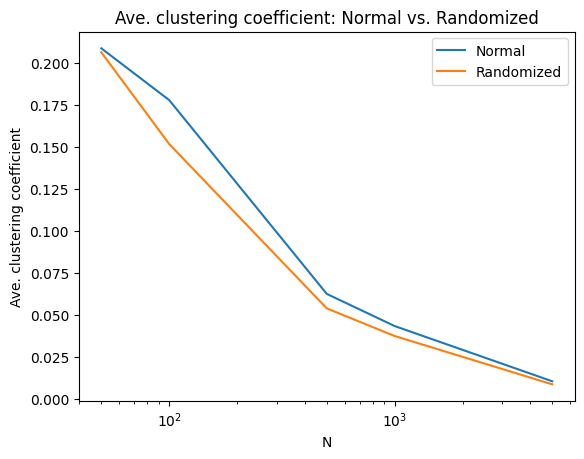

In [95]:
#plot
plt.plot(N, ave_cluster, label="Normal")
plt.plot(N, r_ave_cluster, label="Randomized")
plt.title("Ave. clustering coefficient: Normal vs. Randomized")
plt.xlabel("N")
plt.ylabel("Ave. clustering coefficient")
plt.xscale("log")
plt.legend()
plt.show()

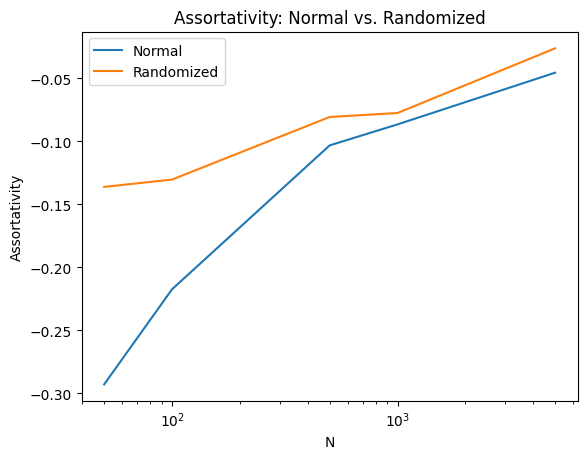

In [96]:
plt.plot(N, assortativity, label="Normal")
plt.plot(N, r_assortativity, label="Randomized")
plt.title("Assortativity: Normal vs. Randomized")
plt.xlabel("N")
plt.ylabel("Assortativity")
plt.xscale("log")
plt.legend()
plt.show()

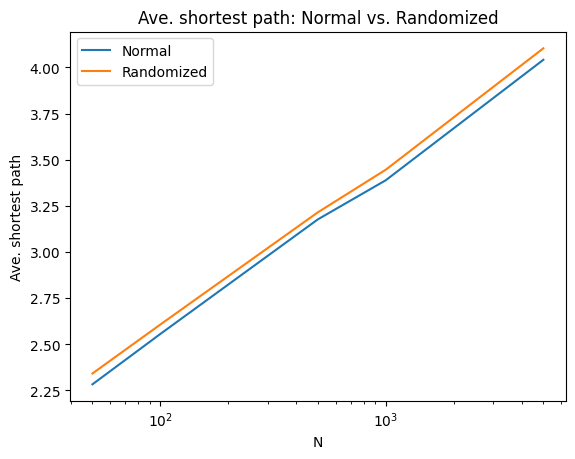

In [97]:
plt.plot(N, ave_shortest_path, label="Normal")
plt.plot(N, r_ave_shortest_path, label="Randomized")
plt.title("Ave. shortest path: Normal vs. Randomized")
plt.xlabel("N")
plt.ylabel("Ave. shortest path")
plt.xscale("log")
plt.legend()
plt.show()

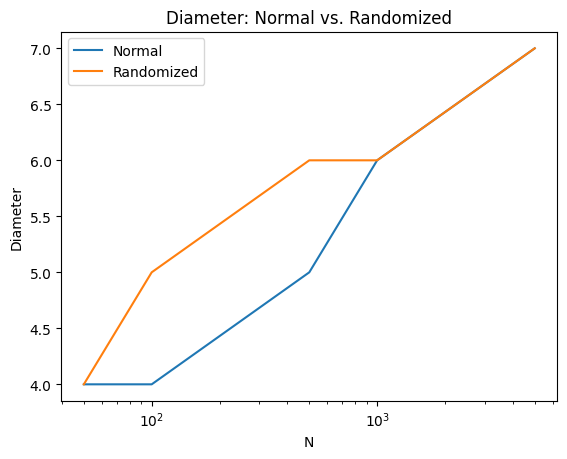

In [98]:
plt.plot(N, diameter, label="Normal")
plt.plot(N, r_diameter, label="Randomized")
plt.title("Diameter: Normal vs. Randomized")
plt.xlabel("N")
plt.ylabel("Diameter")
plt.xscale("log")
plt.legend()
plt.show()

3. Which of these measures is relatively unchanged by randomisation? Why?

The average shortest path and the average clustering coefficient is relatively unchanged.

Generated network from BA model has the important property that some nodes contain the most links (scale-free network which follows powelaw distribution). Thus, while degrees are not changed after randomization, such property remains which lead to relatively unchanged average clustering coefficient and shortest path. 

In [124]:
#A05.3 Barabási-Albert model (2)
#Task: Build networks of 𝑁 = 500 nodes with the BA model, varying the number of new connections 𝑚 ∈ {2, 3, 4, 5}.
m_2 = [2, 3, 4, 5]
N_2 = 500

glist_2 = []
for m in m_2:
    g = nx.barabasi_albert_graph(500, m)
    glist_2.append(g)

glist_2

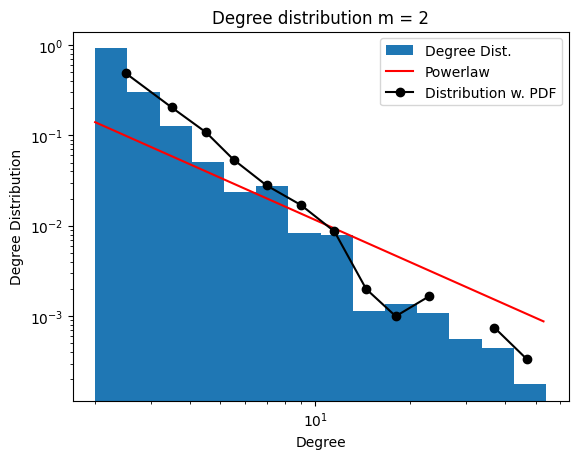

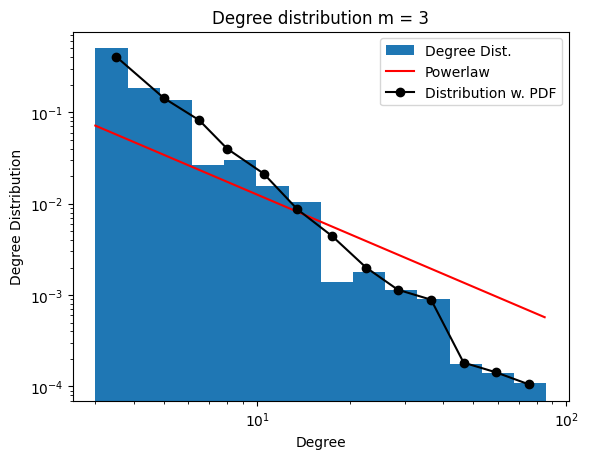

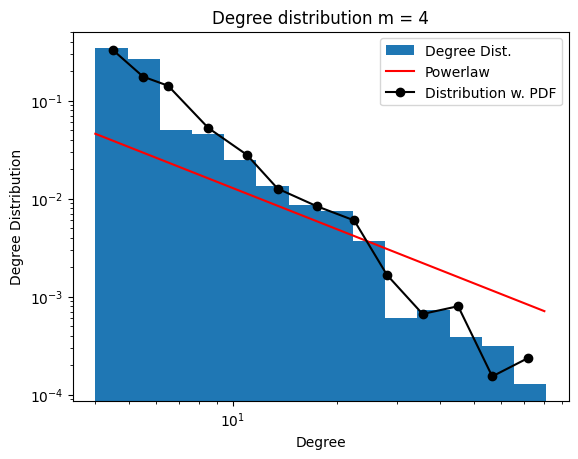

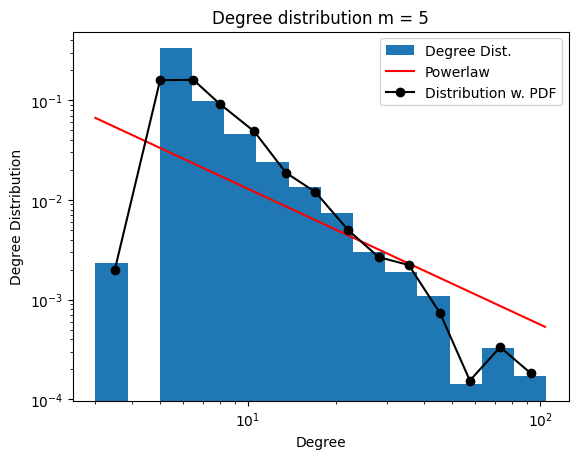

In [130]:
#1. Plot the degree distributions of the resulting networks
for i in range(len(glist_2)):
    #Load degrees
    g_degrees = glist_2[i].degree()
    degrees = [ g_degrees[i] for i in glist_2[i].nodes() ]

    #powerlaw
    k = np.sort(np.asarray([d for d in dict(glist_2[i].degree()).values()]), )
    spacing = np.linspace(min(k),max(k),len(k))
    fit = powerlaw.Fit(k, discrete=True, xmin=1)

    #Create the plot
    my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 15 )
    _ = plt.hist(degrees, bins = my_bins, density = True, label="Degree Dist.")
    fit.power_law.plot_pdf(color='r', label="Powerlaw")
    powerlaw.plot_pdf(k,color='k',marker='o', label="Distribution w. PDF") 
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    plt.xscale("log")
    plt.yscale("log")
    plt.title("Degree distribution m = " + str(m_2[i]))
    plt.legend()
    plt.show()
    


In [127]:
#2. Estimate the power-law fit parameters
alphas = []
for i in range(len(glist_2)):
    #powerlaw
    k = np.sort(np.asarray([d for d in dict(glist_2[i].degree()).values()]), )
    #spacing = np.linspace(min(k),max(k),len(k))
    fit = powerlaw.Fit(k, discrete=True, xmin=1)
    alpha = fit.power_law.alpha
    alphas.append(alpha)

    print("𝛼 of network m = " + str(m_2[i]) + " is: " + str(alpha))


𝛼 of network m = 2 is: 1.5479703827713784
𝛼 of network m = 3 is: 1.4443483291043169
𝛼 of network m = 4 is: 1.391017326274286
𝛼 of network m = 5 is: 1.361175446134289


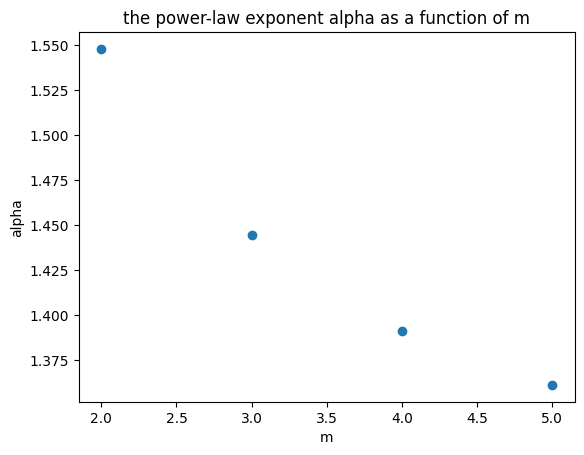

In [128]:
#3. Plot the power-law exponent 𝛼 as a function of m
plt.scatter(m_2, alphas)
plt.title("the power-law exponent alpha as a function of m")
plt.xlabel("m")
plt.ylabel("alpha")
plt.show()